In [1]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Worst seats I have ever enco...
1,Not Verified | Top Ten REASONS to not use Brit...
2,Not Verified | Easy check in on the way to He...
3,✅ Trip Verified | Online check in worked fine...
4,✅ Trip Verified |. The BA first lounge at Term...


In [4]:
df.to_csv("/content/drive/MyDrive/Internships/Forage/BA_reviews.csv")

In [7]:
csv_path = "/content/drive/MyDrive/Internships/Forage/BA_reviews.csv"
df1 = pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

print(df1['reviews'])

0      ✅ Trip Verified | Worst seats I have ever enco...
1      Not Verified | Top Ten REASONS to not use Brit...
2      Not Verified |  Easy check in on the way to He...
3      ✅ Trip Verified |  Online check in worked fine...
4      ✅ Trip Verified |. The BA first lounge at Term...
                             ...                        
995    ✅ Trip Verified |  Bermuda to Gatwick. Usual w...
996    ✅ Trip Verified |  Aberdeen to Boston via Lond...
997    ✅ Trip Verified |  London to Hamburg. Baggage ...
998    ✅ Trip Verified | Flew London Heathrow to Hong...
999    ✅ Trip Verified | Flew to Istanbul with Britis...
Name: reviews, Length: 1000, dtype: object


In [8]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


In [9]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
print(df1)

     Unnamed: 0                                            reviews
0             0  worst seats i have ever encountered in economy...
1             1  top ten reasons to not use british airways to ...
2             2  easy check in on the way to heathrow. the flig...
3             3  online check in worked fine. quick security ch...
4             4  . the ba first lounge at terminal 5 was a  zoo...
..          ...                                                ...
995         995  bermuda to gatwick. usual window and aisle sea...
996         996  aberdeen to boston via london heathrow. i foun...
997         997  london to hamburg. baggage self-check-in was d...
998         998  flew london heathrow to hong kong with british...
999         999  flew to istanbul with british airways on 5th j...

[1000 rows x 2 columns]


In [10]:
#remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0      worst seats i have ever encountered in economy...
1      top ten reasons to not use british airways to ...
2      easy check in on the way to heathrow the fligh...
3      online check in worked fine quick security che...
4       the ba first lounge at terminal 5 was a  zoo ...
                             ...                        
995    bermuda to gatwick usual window and aisle seat...
996    aberdeen to boston via london heathrow i found...
997    london to hamburg baggage selfcheckin was diab...
998    flew london heathrow to hong kong with british...
999    flew to istanbul with british airways on 5th j...
Name: reviews, Length: 1000, dtype: object


<ipython-input-10-05b35ac04ac2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [13]:
# tokenize
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

top ten reasons to not use british airways to all be aware and be on notice travel at your own risk i have travelled for years on many different airlines and i have to say that british airways ranks as one of the top two most horrible airlines to fly dont waste your time or money customer service is nonexistent please be on notice that if you purchase a ticket from them and once they have your money you can kiss any customer service and or help resolving your issue goodbye we used them to travel to europe and it was the worst experience i have had with an airline in years when you work hard and save your money to travel you expect a good experience welp not with this company who i am sure makes millions on customers per year i understand that sometimes things happen but this started right after we booked our flight and the bad experience did not end until we set foot back to our hometown please take note 1  the customer service number is buried on the internet and not listed on their w

In [14]:
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(20))

    Unnamed: 0                                            reviews
0            0  worst seats ever encountered economy class leg...
1            1  top ten reasons use british airways aware noti...
2            2  easy check way heathrow flight time issues ret...
3            3  online check worked fine quick security check ...
4            4  ba first lounge terminal 5 zoo 2pm dirty table...
5            5  paid quick visit nice yesterday heathrow decid...
6            6  words fail describe last awful flight baby acr...
7            7  absolutely terrible experience app would let c...
8            8  ba overbook every flight maximise income regar...
9            9  flights time except belfast london never staff...
10          10  second time flying ba first time wasnt positiv...
11          11  wasnt going bother reviewing flight seem perpe...
12          12  booked business class tickets fiancé reschedul...
13          13  never travel british airways spent 10000 busin...
14        

In [15]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    

    
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
        
    
df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)


print(df1)

     Unnamed: 0                                            reviews  \
0             0  worst seats ever encountered economy class leg...   
1             1  top ten reasons use british airways aware noti...   
2             2  easy check way heathrow flight time issues ret...   
3             3  online check worked fine quick security check ...   
4             4  ba first lounge terminal 5 zoo 2pm dirty table...   
..          ...                                                ...   
995         995  bermuda gatwick usual window aisle seat taken ...   
996         996  aberdeen boston via london heathrow found seat...   
997         997  london hamburg baggage selfcheckin diabolical ...   
998         998  flew london heathrow hong kong british airways...   
999         999  flew istanbul british airways 5th june passpor...   

         polarity       tag  
0    1.110223e-17  Positive  
1    1.515568e-02  Positive  
2    9.666667e-02  Positive  
3    3.861111e-01  Positive  
4   -1.20

In [16]:
(df1.groupby('tag').size()/df1['tag'].count())*100


tag
Negative    31.7
Neutral      1.3
Positive    67.0
dtype: float64

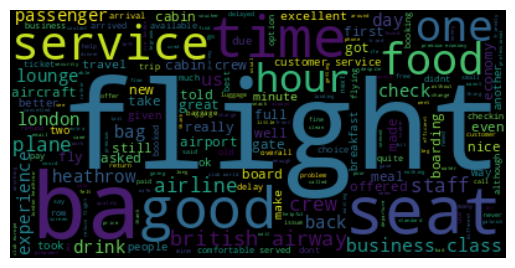

In [17]:
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()

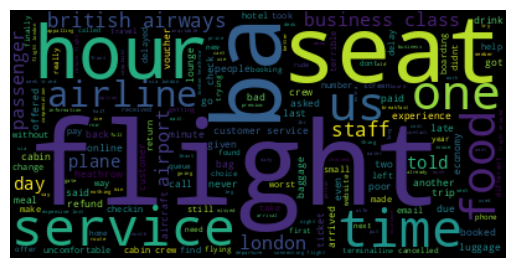

In [18]:
text2= " "        
for ind in df1.index:
    if df1['tag'][ind] == "Negative":
        text2 = text2 + df1['reviews'][ind]  
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

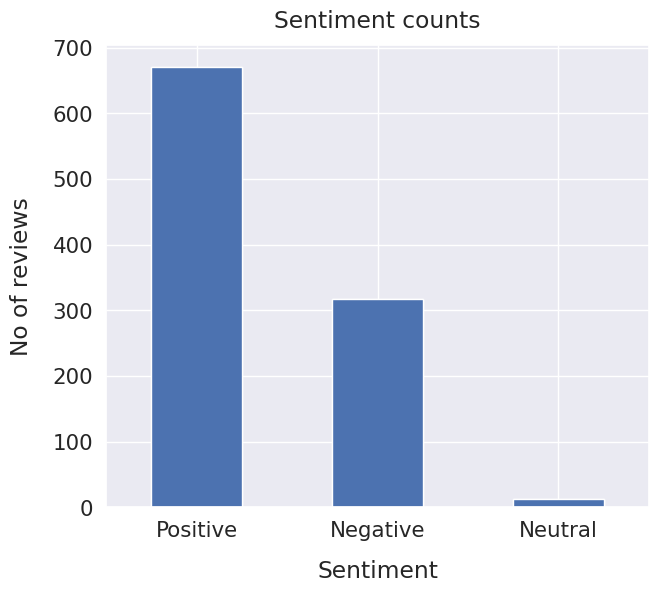

In [20]:
df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentiment counts", y=1.02);